In [1]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import gmaps
import os


In [2]:
#read in raw data.  File from online did not have country index like github jupyter notebook showed
df = pd.read_csv('/Users/kscomputer/Desktop/Project_1/Project_1/output_data/oxford_clean2.csv')
df.head()

,CountryName,Date,C1_School closing,C2_Workplace closing,C6_Stay at home requirements,E1_Income support,E3_Fiscal measures,H6_Facial Coverings,ConfirmedCases,ConfirmedDeaths
0,Brazil,20200101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Brazil,20200102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Brazil,20200103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Brazil,20200104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Brazil,20200105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# Create new dataframe with the 12 countries of interest
#countries = data.loc[["Brazil", "Canada", "China", "Germany", "Italy", "Japan", \
                            # "New Zealand", "South Korea", "Sweden", "United Kingdom", "United States"]]
#df = pd.DataFrame(countries, columns=["Date", "E1_Income support", "E3_Fiscal measures","E4_International support", \
                                                #"ConfirmedCases", "ConfirmedDeaths"])
#df = df.reset_index()
#df.head()

In [4]:
df = df[['CountryName','Date','E1_Income support','E3_Fiscal measures','ConfirmedCases','ConfirmedDeaths']]
df.head()

,CountryName,Date,E1_Income support,E3_Fiscal measures,ConfirmedCases,ConfirmedDeaths
0,Brazil,20200101,0.0,0.0,0.0,0.0
1,Brazil,20200102,0.0,0.0,0.0,0.0
2,Brazil,20200103,0.0,0.0,0.0,0.0
3,Brazil,20200104,0.0,0.0,0.0,0.0
4,Brazil,20200105,0.0,0.0,0.0,0.0


In [5]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')
df.head()
df.set_index('CountryName')

,Date,E1_Income support,E3_Fiscal measures,ConfirmedCases,ConfirmedDeaths
CountryName,,,,,
Brazil,2020-01-01,0.0,0.0,0.0,0.0
Brazil,2020-01-02,0.0,0.0,0.0,0.0
Brazil,2020-01-03,0.0,0.0,0.0,0.0
Brazil,2020-01-04,0.0,0.0,0.0,0.0
Brazil,2020-01-05,0.0,0.0,0.0,0.0
...,...,...,...,...,...
United States,2020-10-21,2.0,0.0,8273304.0,221066.0
United States,2020-10-22,2.0,0.0,8336282.0,222201.0
United States,2020-10-23,2.0,0.0,8408340.0,223042.0


In [6]:
#for loop to determine when income support was provided and what level.
#steps for for loop below to get to first government report of income support.
#brazil = df.loc[df['CountryName']=='Brazil']

In [8]:
#brazil_e = brazil.loc[brazil['E1_Income support']==1]
#brazil_e

,CountryName,Date,E1_Income support,E3_Fiscal measures,ConfirmedCases,ConfirmedDeaths
92,Brazil,2020-04-02,1.0,125175000.0,6836.0,241.0
93,Brazil,2020-04-03,1.0,0.0,7910.0,299.0
94,Brazil,2020-04-04,1.0,0.0,9056.0,359.0
95,Brazil,2020-04-05,1.0,0.0,10278.0,432.0
96,Brazil,2020-04-06,1.0,0.0,11130.0,486.0
...,...,...,...,...,...,...
297,Brazil,2020-10-24,1.0,0.0,5353656.0,156471.0
298,Brazil,2020-10-25,1.0,0.0,5380635.0,156903.0
299,Brazil,2020-10-26,1.0,0.0,5394128.0,157134.0
300,Brazil,2020-10-27,1.0,0.0,5409854.0,157397.0


In [9]:
#df_a = df.loc[(df['E1_Income support']==1)]
#df_b = df.loc[(df['E1_Income support']==2)]

In [10]:
#df_a

,CountryName,Date,E1_Income support,E3_Fiscal measures,ConfirmedCases,ConfirmedDeaths
92,Brazil,2020-04-02,1.0,125175000.0,6836.0,241.0
93,Brazil,2020-04-03,1.0,0.0,7910.0,299.0
94,Brazil,2020-04-04,1.0,0.0,9056.0,359.0
95,Brazil,2020-04-05,1.0,0.0,10278.0,432.0
96,Brazil,2020-04-06,1.0,0.0,11130.0,486.0
...,...,...,...,...,...,...
2418,South Korea,2020-10-25,1.0,0.0,25836.0,457.0
2419,South Korea,2020-10-26,1.0,0.0,25955.0,457.0
2420,South Korea,2020-10-27,1.0,0.0,26043.0,460.0
2421,South Korea,2020-10-28,1.0,0.0,26146.0,461.0


In [11]:
#df_a['CountryName'].value_counts()

Italy          220
South Korea    214
Brazil         210
China          202
Japan          201
Name: CountryName, dtype: int64

In [12]:
#df_b

,CountryName,Date,E1_Income support,E3_Fiscal measures,ConfirmedCases,ConfirmedDeaths
376,Canada,2020-03-15,2.0,0.0,244.0,1.0
377,Canada,2020-03-16,2.0,0.0,304.0,1.0
378,Canada,2020-03-17,2.0,0.0,424.0,4.0
379,Canada,2020-03-18,2.0,367000000.0,569.0,8.0
380,Canada,2020-03-19,2.0,0.0,690.0,9.0
...,...,...,...,...,...,...
3314,United States,2020-10-21,2.0,0.0,8273304.0,221066.0
3315,United States,2020-10-22,2.0,0.0,8336282.0,222201.0
3316,United States,2020-10-23,2.0,0.0,8408340.0,223042.0
3317,United States,2020-10-24,2.0,0.0,8493669.0,223995.0


In [13]:
#df_b['CountryName'].value_counts()

Sweden            231
Canada            229
New Zealand       229
Germany           228
United Kingdom    227
United States     212
Name: CountryName, dtype: int64

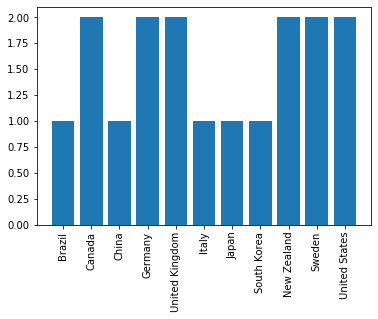

In [14]:
a=df_b.loc[df_b['CountryName']=='Canada']

plt.bar(df['CountryName'],df['E1_Income support'])
plt.xticks(rotation='vertical')
plt.show()

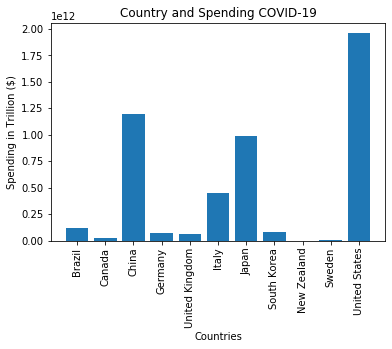

In [26]:
plt.bar(df['CountryName'],df['E3_Fiscal measures'])
plt.xticks(rotation='vertical')
plt.title('Country and Spending COVID-19')
plt.xlabel('Countries')
plt.ylabel('Spending in Trillion ($)')
plt.show()

(array([737425., 737456., 737485., 737516., 737546., 737577., 737607.,
        737638., 737669., 737699., 737730.]),
 <a list of 11 Text xticklabel objects>)

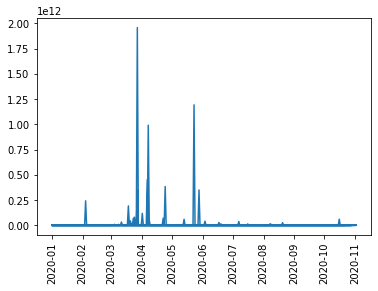

In [16]:
#graph of all countries over time and spending
plt.plot(df['Date'],df['E3_Fiscal measures'])
plt.xticks(rotation='vertical')

In [22]:
#for country in df['CountryName']:
    #fig, ax = plt.subplots()
    #c=df.loc[df['CountryName']==country]
    #ax.plot(c['Date'],c['E3_Fiscal measures'],label=country)
    
#plt.xticks(rotation='vertical')
#plt.xlabel('Date')
#plt.ylabel('Spending in trillion ($)')
#plt.legend()
#plt.show()

SyntaxError: unexpected EOF while parsing (<ipython-input-22-16e5c41e63f3>, line 2)

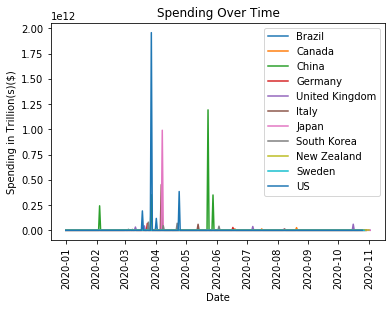

In [25]:
fig, ax = plt.subplots()

brazil = df.loc[df['CountryName']=='Brazil']
ax.plot(brazil['Date'],brazil['E3_Fiscal measures'], label = 'Brazil')

canada = df.loc[df['CountryName']=='Canada']
ax.plot(canada['Date'],canada['E3_Fiscal measures'], label = 'Canada')

china=df.loc[df['CountryName']=='China']
ax.plot(china['Date'],china['E3_Fiscal measures'],label='China')

germany=df.loc[df['CountryName']=='Germany']
ax.plot(germany['Date'],germany['E3_Fiscal measures'],label='Germany')

uk = df.loc[df['CountryName']=='United Kingdom']
ax.plot(uk['Date'],uk['E3_Fiscal measures'],label='United Kingdom')

italy = df.loc[df['CountryName']=='Italy']
ax.plot(italy['Date'],italy['E3_Fiscal measures'],label='Italy')

japan=df.loc[df['CountryName']=='Japan']
ax.plot(japan['Date'],japan['E3_Fiscal measures'],label='Japan')

sk=df.loc[df['CountryName']=='South Korea']
ax.plot(sk['Date'],sk['E3_Fiscal measures'],label='South Korea')

nz= df.loc[df['CountryName']=='New Zealand']
ax.plot(nz['Date'],nz['E3_Fiscal measures'],label='New Zealand')

meatball= df.loc[df['CountryName']=='Sweden']
ax.plot(meatball['Date'],meatball['E3_Fiscal measures'],label='Sweden')


us = df.loc[df['CountryName']=='United States']
ax.plot(us['Date'],us['E3_Fiscal measures'],label='US')
plt.xticks(rotation='vertical')
plt.title('Spending Over Time')
plt.xlabel('Date')
plt.ylabel('Spending in Trillion(s)($)')
plt.legend()
plt.show()

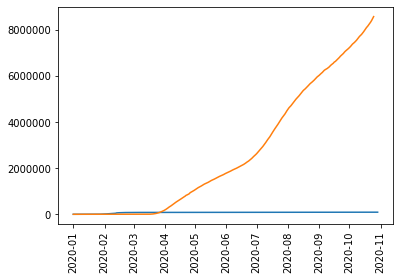

In [47]:
#fig, ax = plt.subplots()
#ax.plot(us['Date'],us['E3_Fiscal measures'])
plt.plot(china['Date'],china['ConfirmedCases'])
plt.plot(us['Date'],us['ConfirmedCases'])
plt.xticks(rotation='vertical')
plt.show()

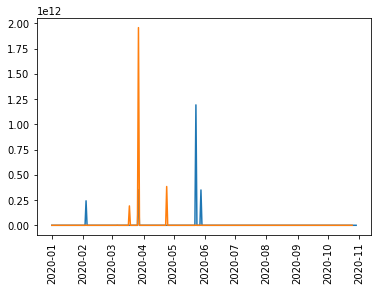

In [48]:

plt.plot(china['Date'],china['E3_Fiscal measures'])
plt.plot(us['Date'],us['E3_Fiscal measures'])
plt.xticks(rotation='vertical')
plt.show()

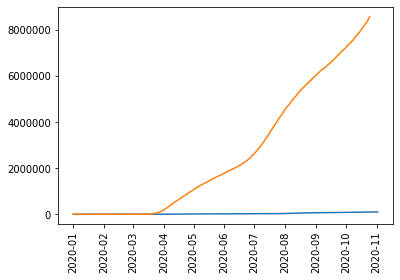

In [49]:
plt.plot(japan['Date'],japan['ConfirmedCases'])
plt.plot(us['Date'],us['ConfirmedCases'])
plt.xticks(rotation='vertical')
plt.show()

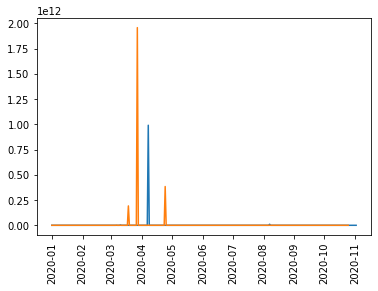

In [50]:
plt.plot(japan['Date'],japan['E3_Fiscal measures'])
plt.plot(us['Date'],us['E3_Fiscal measures'])
plt.xticks(rotation='vertical')
plt.show()

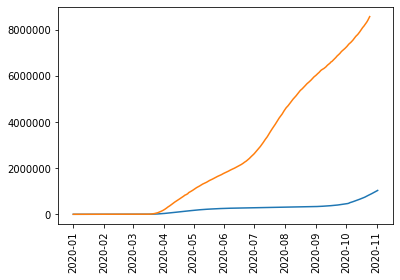

In [51]:
plt.plot(uk['Date'],uk['ConfirmedCases'])
plt.plot(us['Date'],us['ConfirmedCases'])
plt.xticks(rotation='vertical')
plt.show()

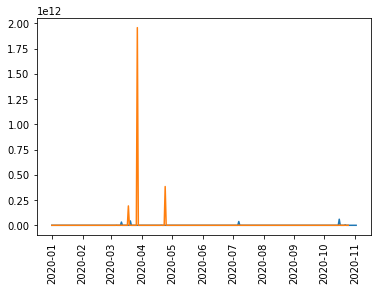

In [52]:
plt.plot(uk['Date'],uk['E3_Fiscal measures'])
plt.plot(us['Date'],us['E3_Fiscal measures'])
plt.xticks(rotation='vertical')
plt.show()

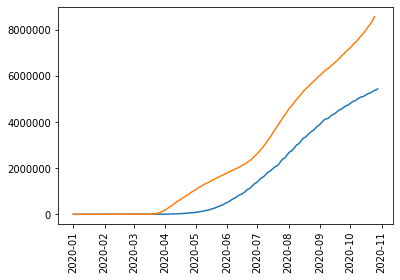

In [56]:
plt.plot(brazil['Date'],brazil['ConfirmedCases'])
plt.plot(us['Date'],us['ConfirmedCases'])
plt.xticks(rotation='vertical')
plt.show()

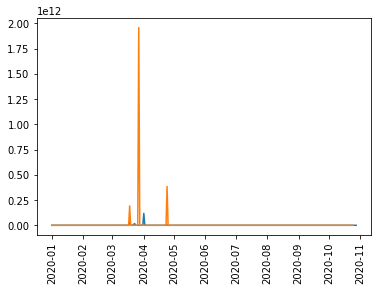

In [57]:
plt.plot(brazil['Date'],brazil['E3_Fiscal measures'])
plt.plot(us['Date'],us['E3_Fiscal measures'])
plt.xticks(rotation='vertical')
plt.show()